Index(['Class Index', 'Title', 'Description'], dtype='object')
Train Accuracy: 0.85
Test Accuracy: 0.85
Model Accuracy: 0.9026315789473685

Per-class Metrics:
              precision    recall  f1-score   support

           1       0.91      0.90      0.90      1900
           2       0.95      0.98      0.96      1900
           3       0.87      0.86      0.87      1900
           4       0.88      0.88      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600

Epoch 1/10
3750/3750 [==============================] - 147s 39ms/step - loss: 0.3969 - accuracy: 0.8542 - val_loss: 0.2530 - val_accuracy: 0.9150
Epoch 2/10
3750/3750 [==============================] - 149s 40ms/step - loss: 0.1769 - accuracy: 0.9403 - val_loss: 0.2468 - val_accuracy: 0.9179
Epoch 3/10
3750/3750 [==============================] - 146s 39ms/step - loss: 0.1176 - accuracy: 0.9599 - val_l

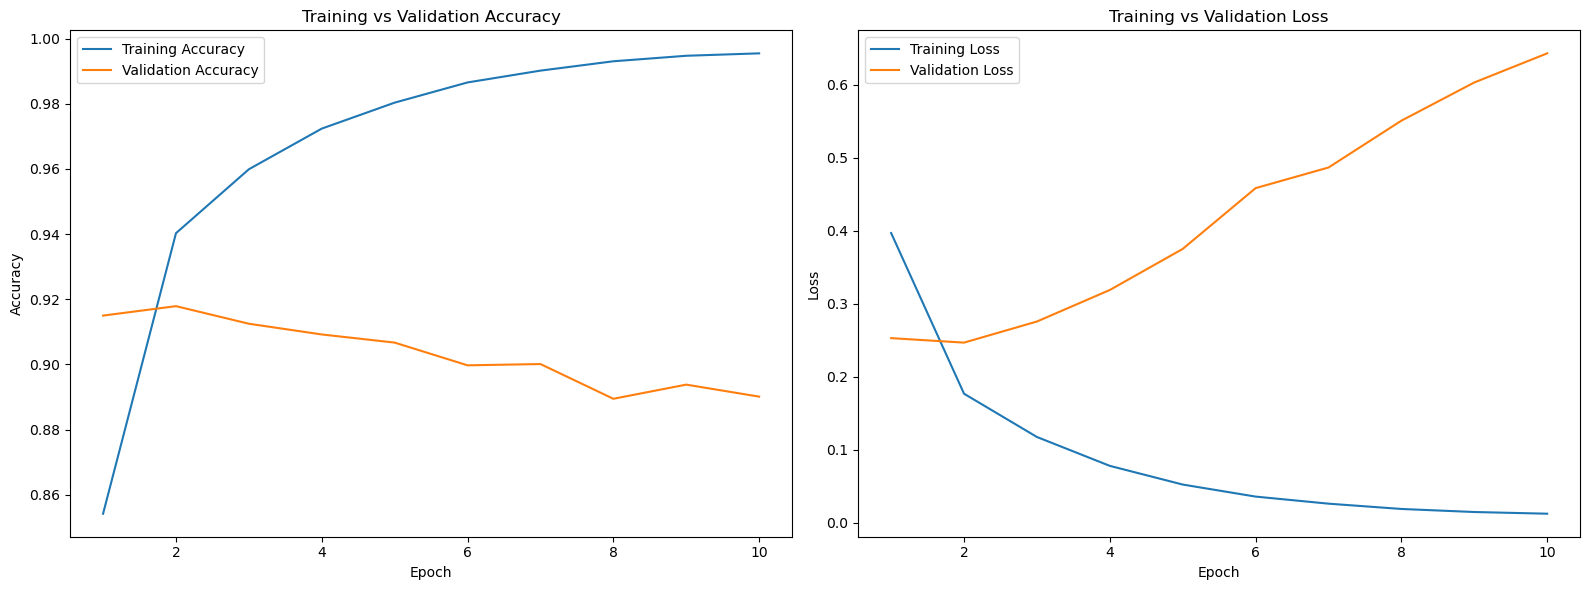

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 70, 100)           13619100  
                                                                 
 conv1d_1 (Conv1D)           (None, 68, 128)           38528     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dense_3 (Dense)             (None, 5)                 85        
                                                                 
Total params: 13,659,777
Trainable params: 40,677
Non-trainable params: 13,619,100
_____________________________________

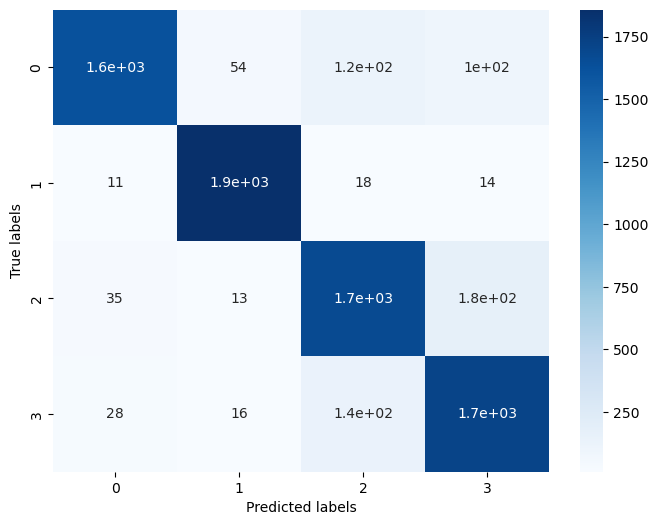

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thuho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.series.Series'>
RangeIndex: 120000 entries, 0 to 119999
Series name: None
Non-Null Count   Dtype
--------------   -----
120000 non-null  int64
dtypes: int64(1)
memory usage: 937.6 KB
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          13042900  
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 16)                2064      
                                                                 
 dense_5 (Dense)             (None, 5)           

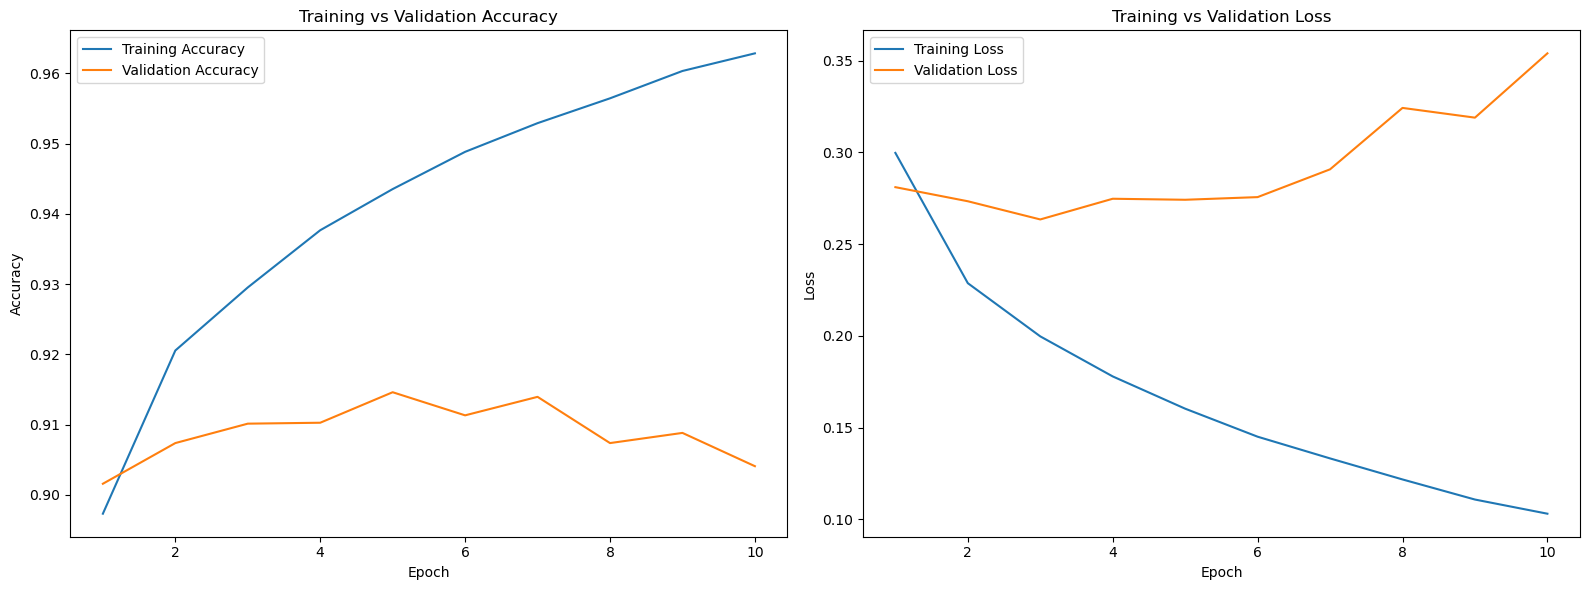

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          13042900  
                                                                 
 conv1d_3 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 16)                2064      
                                                                 
 dense_7 (Dense)             (None, 5)                 85        
                                                                 
Total params: 13,109,177
Trainable params: 13,109,177
Non-trainable params: 0
__________________________________________

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D, Dense
from tensorflow.keras.initializers import Constant
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV


# Load dataset
train_dataset = pd.read_csv("data//train.csv")
print(train_dataset.columns)

test_dataset = pd.read_csv("data//test.csv")

X_train = train_dataset['Title'] + train_dataset['Description']
y_train = train_dataset['Class Index']
X_test = test_dataset['Title'] + test_dataset['Description']
y_test = test_dataset['Class Index']

## Step 1 - Build a classifier using Term Frequency

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

vectorizer.vocabulary_

classifier = MultinomialNB()
classifier.fit(X_train_tf, y_train)

# Accuracy scores
train_accuracy_1 = classifier.score(X_train_tf, y_train)
test_accuracy_1 = classifier.score(X_test_tf, y_test)

print(f"Train Accuracy: {train_accuracy_1:.2f}")
print(f"Test Accuracy: {test_accuracy_1:.2f}")


## Step 2 - Build a classifier using Term Frequency - IDF

# Create a TF-IDF vectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to the training data and transform both the training and test data
train_x_tfidf = vectorizer_tfidf.fit_transform(X_train)
test_x_tfidf = vectorizer_tfidf.transform(X_test)
 
# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(train_x_tfidf, y_train)

# Make predictions on the test set
predictions = classifier.predict(test_x_tfidf)


# Evaluate the model
test_accuracy_2 = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {test_accuracy_2}")
print("\nPer-class Metrics:")
print(classification_report(y_test, predictions))

## Step 3 - Build a classifier using CNN

# Tokenize and pad text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
train_seq_x_cnn = pad_sequences(sequences_train, maxlen = 70)

y_train_cnn = np.array(y_train)

sequences_test = tokenizer.texts_to_sequences(X_test)
test_seq_x_cnn = pad_sequences(sequences_test, maxlen= 70)
y_test_cnn = np.array(y_test)


# Build CNN model
model_1 = Sequential([
    Embedding(
        input_dim=len(tokenizer.word_index) + 1,   # Vocabulary size
        output_dim=50,        # Embedding dimension
        input_length=70,  # Sequence length
        trainable=True         # Embedding layer will be updated during training
    ),
    Conv1D(128, 3, activation='relu'),  # 128 filters, kernel size 3
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')     
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model with validation
history = model_1.fit(
    train_seq_x_cnn, y_train_cnn,
    epochs=10,
    batch_size=32,
    validation_data=(test_seq_x_cnn, y_test_cnn)
)

# Create summary of model
model_1.summary()

# Evaluate model
loss_3, test_accuracy_3 = model_1.evaluate(test_seq_x_cnn, y_test_cnn)
print(f"Test Accuracy: {test_accuracy_3:.2f}")

# Plot accuracy curves

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot accuracy curves on the first subplot
sns.lineplot(x=range(1, len(history.history['accuracy']) + 1), y=history.history['accuracy'], label='Training Accuracy', ax=axs[0])
sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1), y=history.history['val_accuracy'], label='Validation Accuracy', ax=axs[0])
axs[0].set_title('Training vs Validation Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss curves on the second subplot
sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Training Loss', ax=axs[1])
sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Validation Loss', ax=axs[1])
axs[1].set_title('Training vs Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

### Step 4 - CNN-based text classifier using pre-trained word embeddings such as GloVe

# Load GloVe embeddings

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

# Create embedding matrix
embedding_dim = 100
embedding_matrix = create_embedding_matrix('glove.6B.100d.txt', 
                                           tokenizer.word_index, 
                                           embedding_dim)


# Build CNN model
model_2 = Sequential([
    Embedding(
        input_dim=len(tokenizer.word_index)+1,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=70,  # Sequence length
        trainable=False  # Set to False to use pre-trained embeddings
    ),
    Conv1D(128, 3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_2.summary()

# Train model
history = model_2.fit(train_seq_x_cnn, y_train_cnn, epochs=10, batch_size=32, validation_data=(test_seq_x_cnn, y_test_cnn))

# Evaluate model
loss_4, test_accuracy_4 = model_2.evaluate(test_seq_x_cnn, y_test_cnn)
print(f"Test Accuracy: {test_accuracy_4:.2f}")

# Predictions for confusion matrix
y_pred = model_2.predict(test_seq_x_cnn)
y_pred_class = np.argmax(y_pred, axis = 1)


# Confusion matrix
cm = confusion_matrix(y_test_cnn, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


### Step 5 - 3rd CNN-based text classifier with pre-processing and hyperparameter tunings

# Text preprocessing libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

## EDA
# Summary statistics
text_lengths = X_train.apply(len)
text_lengths.info()
text_lengths.describe()

# Check text quality for stop words, punctuation and apostrophes

# Remove Stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # Use set for faster lookups
    words = text.split()
    filtered_sentence = ' '.join([word for word in words if word not in stop_words])
    return filtered_sentence

# Normalize Text (Handle Special Characters, URLs, and Extra Spaces)
def normalize_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub('[^A-Za-z0-9]+', ' ', text)  # Remove non-alphanumeric characters (special chars)
    text = re.sub('\n', ' ', text)  # Remove newlines
    text = re.sub(' +', ' ', text)  # Remove extra spaces
    text = text.strip()  # Remove leading/trailing spaces
    return text

# Remove Punctuation
def remove_punctuation(text):
    table = str.maketrans('', '', string.punctuation)  # Create translation table
    words = text.split()
    filtered_sentence = ' '.join([word.translate(table) for word in words])  # Efficient punctuation removal
    return filtered_sentence


X_train_filtered = X_train.apply(normalize_text)
X_train_filtered = X_train_filtered.apply(remove_stopwords)
X_train_filtered = X_train_filtered.apply(remove_punctuation)

X_test_filtered = X_test.apply(normalize_text)
X_test_filtered = X_test_filtered.apply(remove_stopwords)
X_test_filtered = X_test_filtered.apply(remove_punctuation)


# Main settings
epochs = 10
embedding_dim = 100
maxlen = 100

# Tokenize words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train_filtered)
X_train_cnn_3 = tokenizer.texts_to_sequences(X_train_filtered)
X_test_cnn_3 = tokenizer.texts_to_sequences(X_test_filtered)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences with zeros
X_train_cnn_3 = pad_sequences(X_train_cnn_3, padding='post', maxlen=maxlen)
X_test_cnn_3 = pad_sequences(X_test_cnn_3, padding='post', maxlen=maxlen)

y_train_cnn_3 = np.array(y_train)
y_test_cnn_3 = np.array(y_test)

# Build CNN model
model = Sequential([
    Embedding(
        input_dim=len(tokenizer.word_index)+1,
        output_dim=embedding_dim,
        input_length=100,  # Sequence length
        trainable=False  # Set to False to use pre-trained embeddings
    ),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot accuracy curves on the first subplot
sns.lineplot(x=range(1, len(history.history['accuracy']) + 1), y=history.history['accuracy'], label='Training Accuracy', ax=axs[0])
sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1), y=history.history['val_accuracy'], label='Validation Accuracy', ax=axs[0])
axs[0].set_title('Training vs Validation Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss curves on the second subplot
sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Training Loss', ax=axs[1])
sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Validation Loss', ax=axs[1])
axs[1].set_title('Training vs Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

## Hyperparameters tuning

# Function to create a Keras model
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# # Parameter grid for grid search
# # num_filters=[32, 64, 128]
# # kernel_size=[3, 5, 7]
# param_grid = dict(num_filters=[32, 64, 128],
#                     kernel_size=[3, 5],
#                     vocab_size=[vocab_size],
#                     embedding_dim=[embedding_dim],
#                     maxlen=[maxlen])
# model = KerasClassifier(build_fn=create_model,
#                         epochs=epochs, batch_size=32,
#                         verbose=False)
# grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
#                             cv=2, verbose=1, n_iter=3)
# grid_result = grid.fit(X_train_cnn_3, y_train_cnn_3)

# # Evaluate testing set
# test_accuracy = grid.score(X_test_cnn_3, y_test_cnn_3)

# print("Best Parameters: ", grid_result.best_params_)
# print("Best Score: ", grid_result.best_score_)

#Final model after hyperparameters tuning

final_model = create_model(num_filters=128, kernel_size=5, embedding_dim=100, vocab_size=130429, maxlen=100)

final_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

final_model.summary()

# Train model
history = final_model.fit(X_train_cnn_3, y_train_cnn_3, epochs=10, batch_size=32, validation_data=(X_test_cnn_3, y_test_cnn_3))

# Evaluate model
loss_5, test_accuracy_5 = final_model.evaluate(X_test_cnn_3, y_test_cnn_3)
print(f"Test Accuracy: {test_accuracy_5:.2f}")

### Step 6 - Summary of test accuracy for all models from step 1 to 5

# Initialize a dictionary to store test accuracy results
steps_summary = [
    "Step 1 - Multinomial Naive Bayes (Term Frequency)",
    "Step 2 - Multinomial Naive Bayes (TF-IDF)",
    "Step 3 - CNN with Random Embeddings",
    "Step 4 - CNN with Pre-trained Embeddings",
    "Step 5 - CNN with Techniques"
]

accuracy_score_summary = [test_accuracy_1, test_accuracy_2, test_accuracy_3, test_accuracy_4, test_accuracy_5]

summary_df = pd.DataFrame(steps_summary, accuracy_score_summary)

In [ ]:
summary_df = pd.DataFrame(steps_summary, accuracy_score_summary)

In [ ]:
summary_df

,0
0.847895,Step 1 - Multinomial Naive Bayes (Term Frequency)
0.902632,Step 2 - Multinomial Naive Bayes (TF-IDF)
0.890132,Step 3 - CNN with Random Embeddings
0.904079,Step 4 - CNN with Pre-trained Embeddings
0.900526,Step 5 - CNN with Techniques


In [ ]:
summary_df = pd.DataFrame(accuracy_score_summary, steps_summary).reset_index()

In [ ]:
summary_df

,index,0
0,Step 1 - Multinomial Naive Bayes (Term Frequency),0.847895
1,Step 2 - Multinomial Naive Bayes (TF-IDF),0.902632
2,Step 3 - CNN with Random Embeddings,0.890132
3,Step 4 - CNN with Pre-trained Embeddings,0.904079
4,Step 5 - CNN with Techniques,0.900526
